# Assignment 2

The data for this assignment comes from a subset of The National Centers for Environmental Information. The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
df = pd.read_csv('data.csv')
df = df.drop('Unnamed: 0',1)

In [25]:
df

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
5,USW00014833,2010-10-01,TMAX,194
6,USC00207308,2010-06-29,TMIN,144
7,USC00203712,2005-10-04,TMAX,289
8,USW00004848,2007-12-14,TMIN,-16
9,USC00200220,2011-04-21,TMAX,72


##### Exercise 1

Write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. **The area between the record high and record low temperatures for each day should be shaded**


In [7]:
new_df = pd.DataFrame(df.Date.str.split('-', 1).tolist(), columns=['year', 'month-day'])
df = df.join(new_df)

In [8]:
df =df.sort_values('year')

In [45]:
df[df['Date'] == '2005-01-01']['Data_Value'].max()

156

In [81]:
max_temp = list()
min_temp = list()
dates = list()
unique_dates = df['year'].unique()
for date in unique_dates:
    max_temp.append(df[df['year'] == date]['Data_Value'].max())
    min_temp.append(df[df['year'] == date]['Data_Value'].min())
    dates.append(date)
 


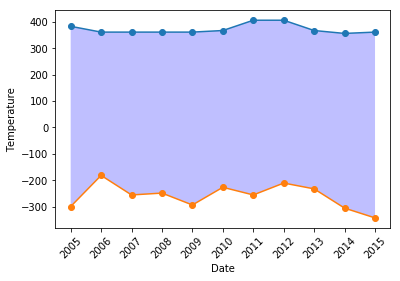

done


In [85]:
plt.figure()
plt.plot(dates, max_temp, '-o', dates, min_temp, '-o')
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
#x.set_title('Exponential vs. Linear performance')
# you can add mathematical expressions in any text element
#x.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

plt.gca().fill_between(range(len(dates)), 
                       max_temp, min_temp, 
                       facecolor='blue', 
                       alpha=0.25)
plt.show()
print('done')